In [3]:
from utils import generate_datasets
pilist = [0.1,0.5, 0.6, 0.8, 0.9]
for pi in pilist:
    generate_datasets(pi=pi, cov_scale=4.0, mean_shift_factor=2.0, output_folder="data_folder")




c:\Users\giaco\Documenti\statistical_methods\final_proj\distribution-shift\myBeautifulNBs\utils.py:14: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
c:\Users\giaco\Documenti\statistical_methods\final_proj\distribution-shift\myBeautifulNBs\utils.py:14: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
c:\Users\giaco\Documenti\statistical_methods\final_proj\distribution-shift\myBeautifulNBs\utils.py:14: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
c:\Users\giaco\Documenti\statistical_methods\final_proj\distribution-shift\myBeautifulNBs\utils.py:14: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


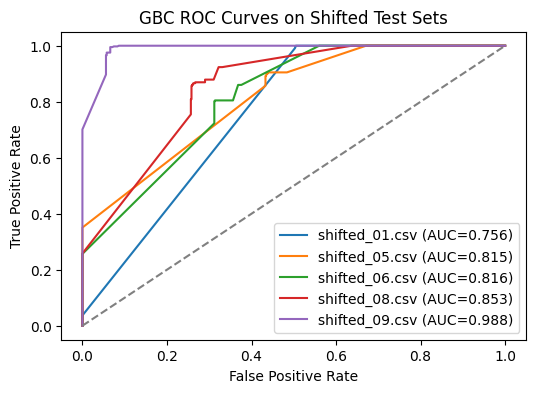

In [4]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier
import os


train_data = pd.read_csv("data_folder/original.csv")
x_train = train_data.drop("target", axis=1)
y_train = train_data["target"]

model = GradientBoostingClassifier()
model.fit(x_train, y_train)

# Evaluate on multiple shifted test sets and plot ROC
test_files = [f for f in os.listdir("data_folder") if f != "original.csv"]

plt.figure(figsize=(6, 4))
for f in test_files:
    data = pd.read_csv(os.path.join("data_folder", f))
    X_t = data.drop("target", axis=1)
    y_t = data["target"]
    y_proba = model.predict_proba(X_t)[:,1]
    fpr, tpr, _ = roc_curve(y_t, y_proba)
    auc = roc_auc_score(y_t, y_proba)
    plt.plot(fpr, tpr, label=f"{f} (AUC={auc:.3f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("GBC ROC Curves on Shifted Test Sets")
plt.legend()
plt.show()


In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
import os


train_data = pd.read_csv("data_folder/original.csv")
x_train = train_data.drop("target", axis=1)
y_train = train_data["target"]

model =     DecisionTreeClassifier()
model.fit(x_train, y_train)

# Evaluate on multiple shifted test sets and plot ROC
test_files = [f for f in os.listdir("data_folder") if f != "original.csv"]

plt.figure(figsize=(6, 4))
for f in test_files:
    data = pd.read_csv(os.path.join("data_folder", f))
    X_t = data.drop("target", axis=1)
    y_t = data["target"]
    y_proba = model.predict_proba(X_t)[:,1]
    fpr, tpr, _ = roc_curve(y_t, y_proba)
    auc = roc_auc_score(y_t, y_proba)
    plt.plot(fpr, tpr, label=f"{f} (AUC={auc:.3f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Dec tree ROC Curves on Shifted Test Sets")
plt.legend()
plt.show()
